In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df=pd.read_csv("clv_data.csv")

In [87]:
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

In [89]:
df['Date'] = pd.to_datetime(df['Date'])

In [90]:
df.isnull().sum()

Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
df.describe()

,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,2023-08-16 09:16:24.959999744,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
min,2023-01-01 00:00:00,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,2023-04-30 00:00:00,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,2023-08-17 00:00:00,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,2023-12-06 00:00:00,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,2024-03-26 00:00:00,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000
std,NaN,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542


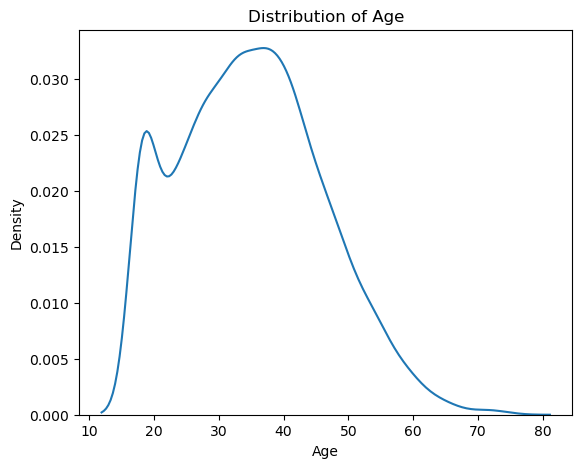

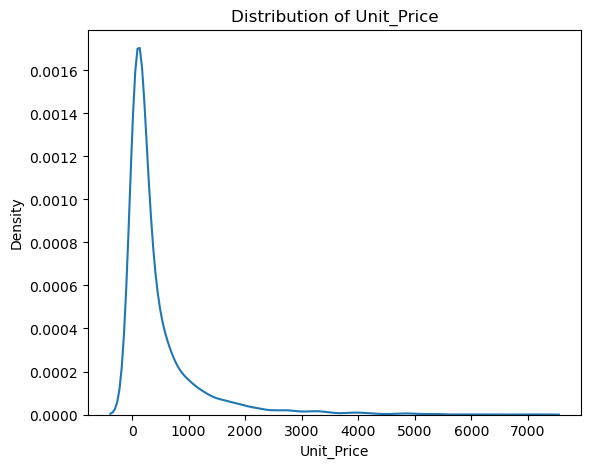

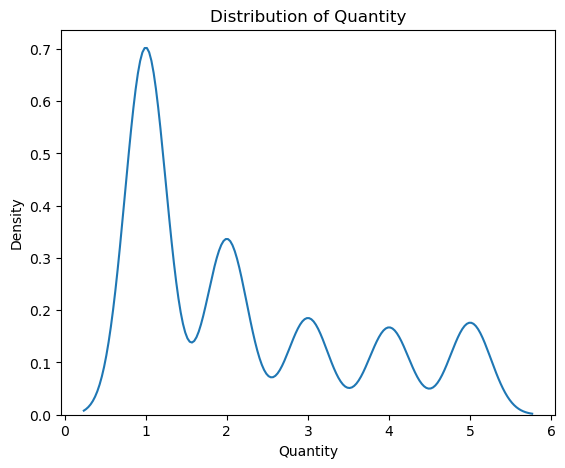

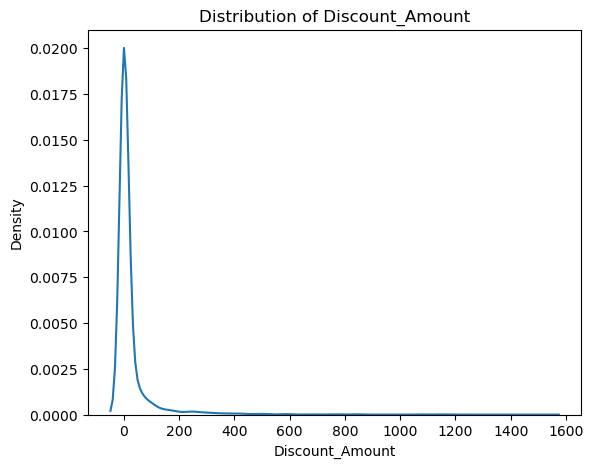

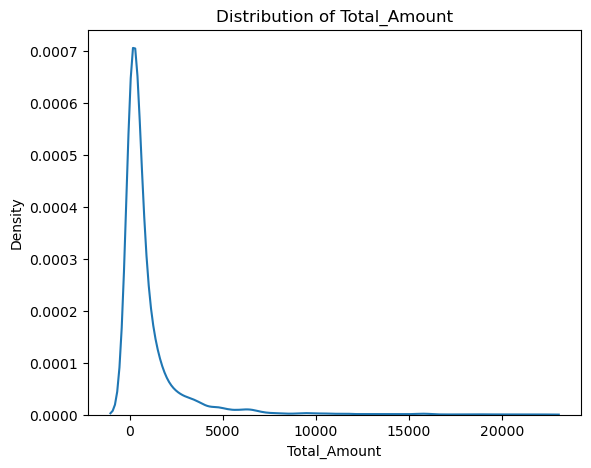

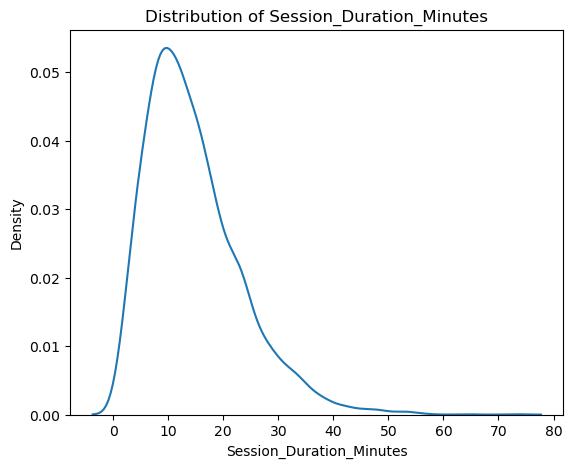

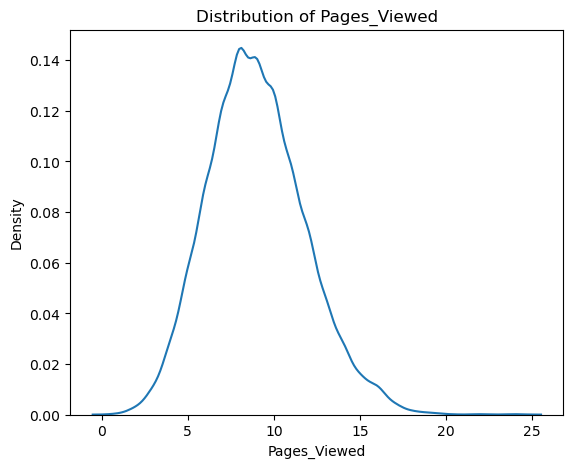

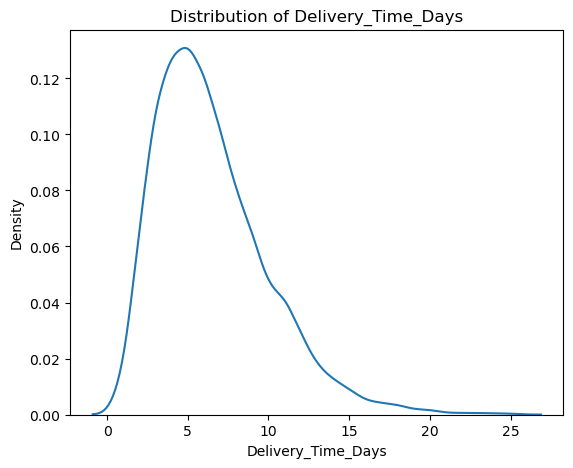

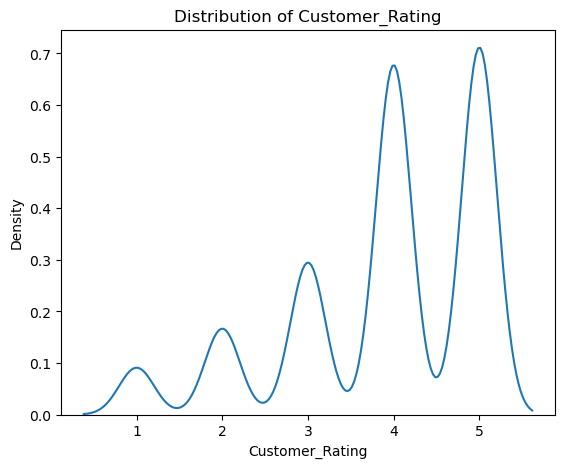

In [93]:
num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount','Session_Duration_Minutes','Pages_Viewed','Delivery_Time_Days','Customer_Rating']

for col in num_cols:
    plt.figure(figsize=(14,5))
  

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.kdeplot(df[col])
    plt.title(f"Distribution of {col}")

<Axes: >

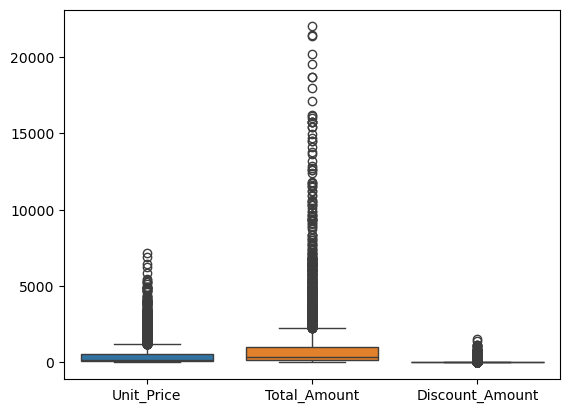

In [94]:

sns.boxplot(data=df[["Unit_Price", "Total_Amount", "Discount_Amount"]])

In [95]:
df['Total_Amount'] = df['Total_Amount'].round(0).astype(int)

In [96]:


num_cols = ["Unit_Price", "Total_Amount", "Discount_Amount"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap and floor the outliers
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

print(df[num_cols].describe())

        Unit_Price  Total_Amount  Discount_Amount
count  5000.000000   5000.000000      5000.000000
mean    353.589695    672.898600         5.219484
std     372.751011    733.108543         8.713484
min       5.180000      8.000000         0.000000
25%      76.587500    123.000000         0.000000
50%     182.950000    338.000000         0.000000
75%     513.930000    980.000000         8.760000
max    1169.943750   2265.500000        21.900000


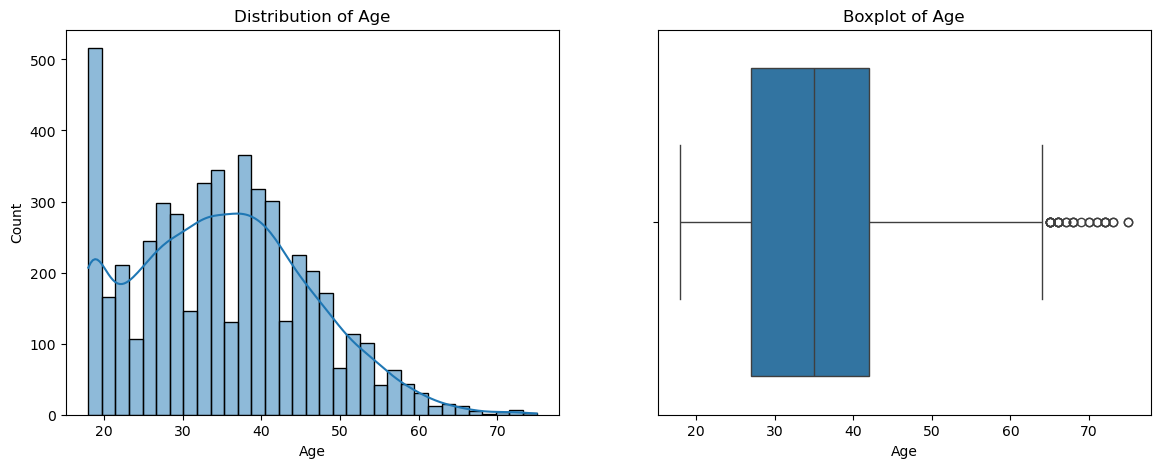

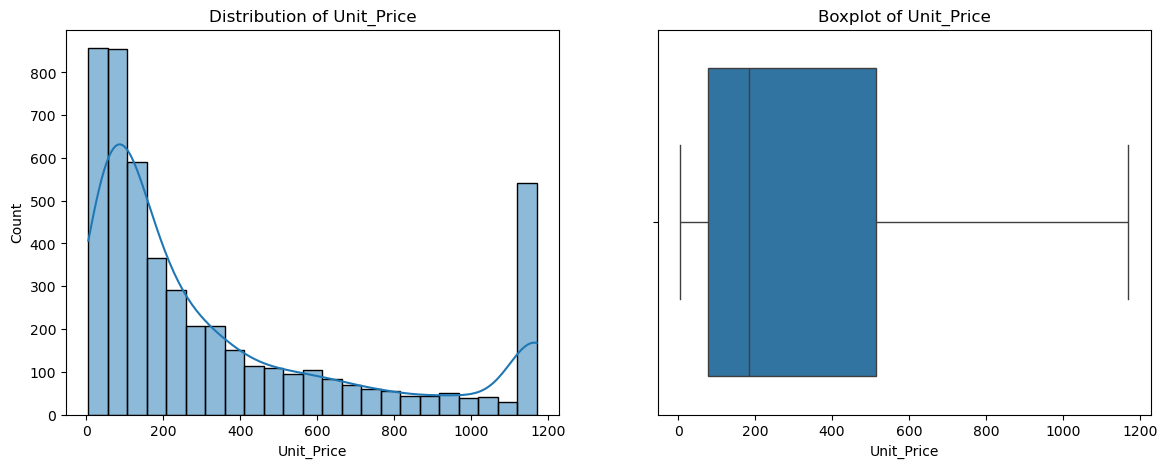

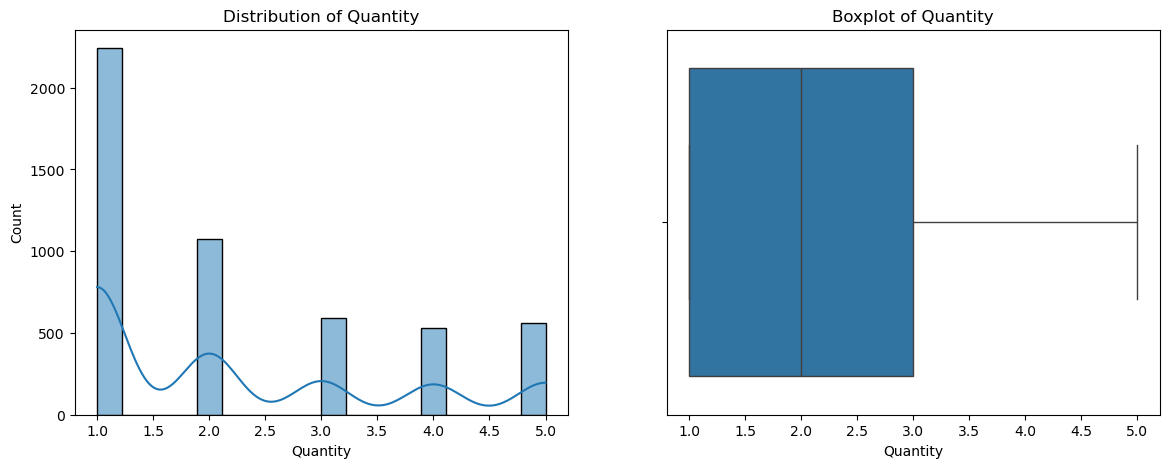

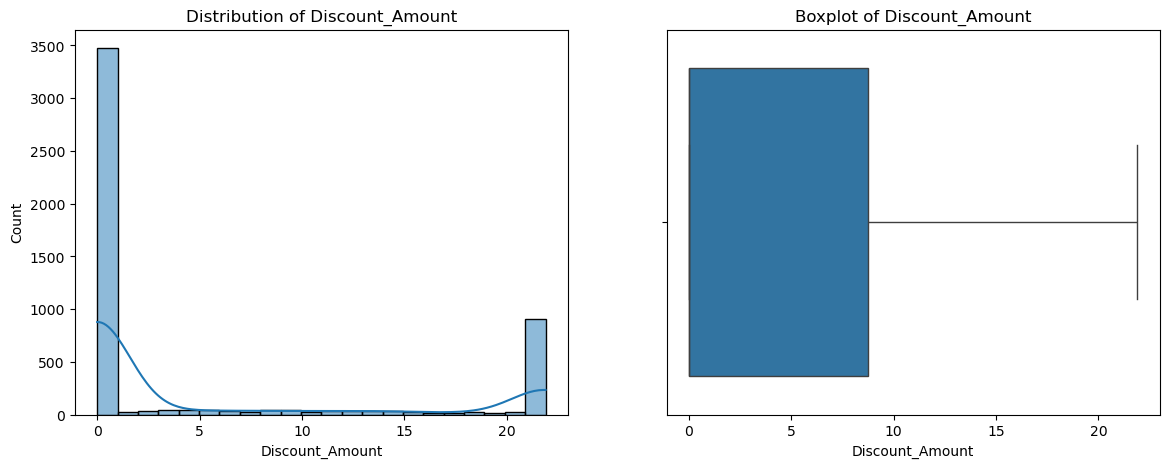

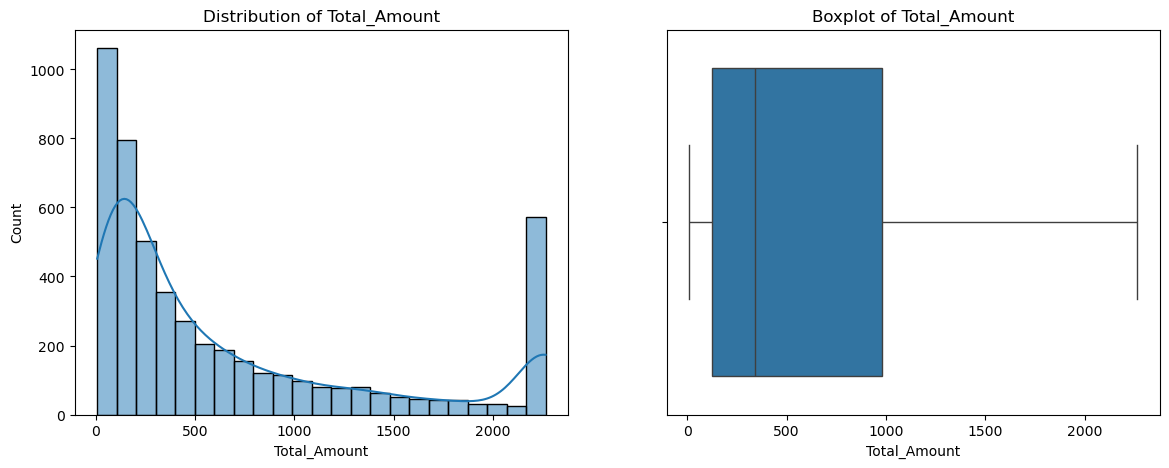

In [97]:
num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount']

for col in num_cols:
    plt.figure(figsize=(14,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()


In [98]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [99]:
cat_cols = [
    'Gender',
    'City',
    'Product_Category',
    'Payment_Method',
    'Device_Type',
    'Is_Returning_Customer'
]

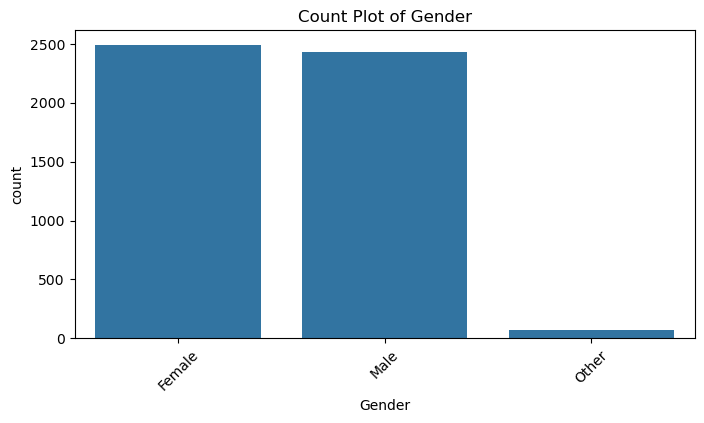

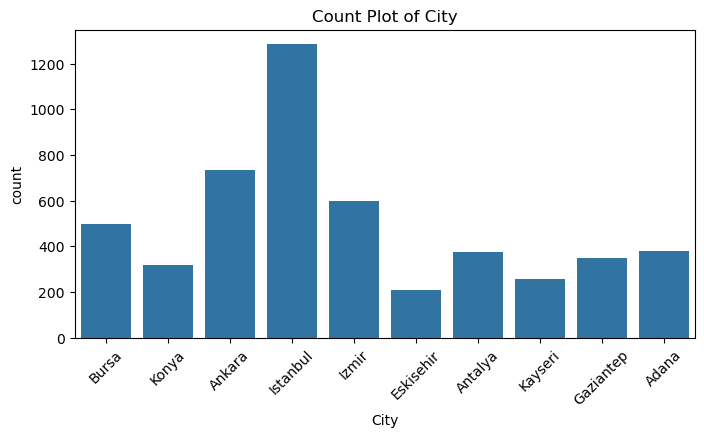

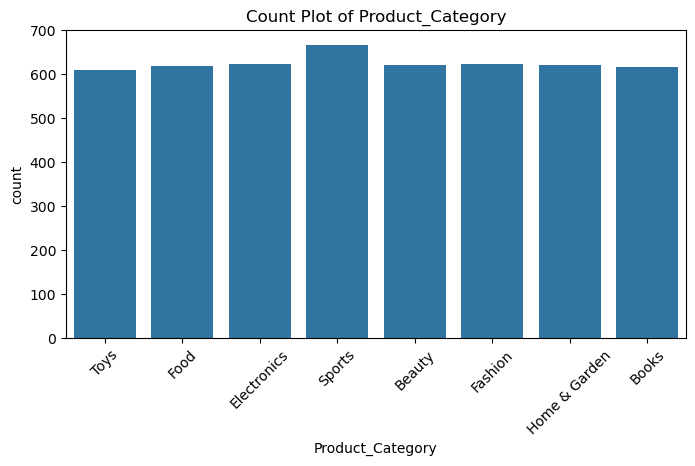

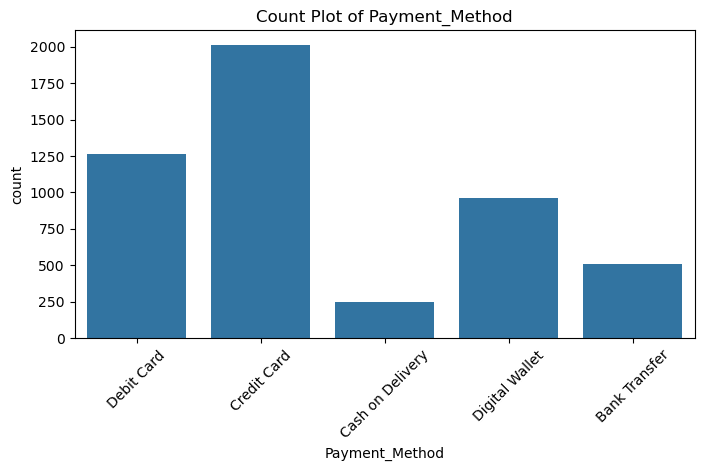

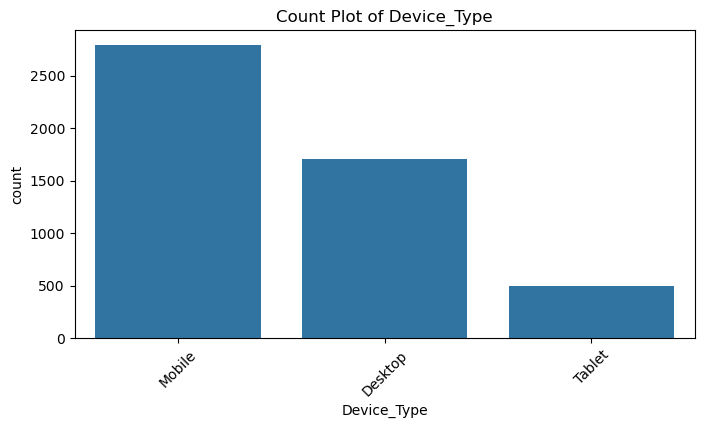

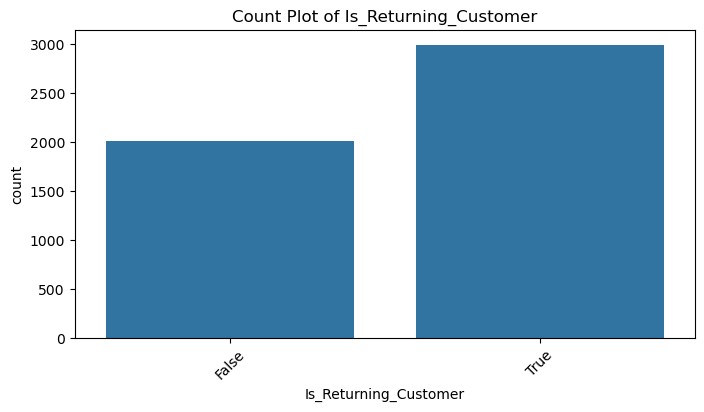

In [100]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [101]:
# C# Step 1: Aggregate Total_Amount per customer
# Step 1: Calculate total spent per customer
total_spent = df.groupby('Customer_ID')['Total_Amount'].sum()

# Step 2: Create new feature Total_Spent in df using map()
df['Total_Spent'] = df['Customer_ID'].map(total_spent)

# Step 3: Set target variable
target = 'Total_Spent'


In [102]:
df['Total_Spent']

0         54.0
1        245.0
2        241.0
3        575.0
4       2265.5
         ...  
4995     103.0
4996      72.0
4997      34.0
4998     171.0
4999     315.0
Name: Total_Spent, Length: 5000, dtype: float64

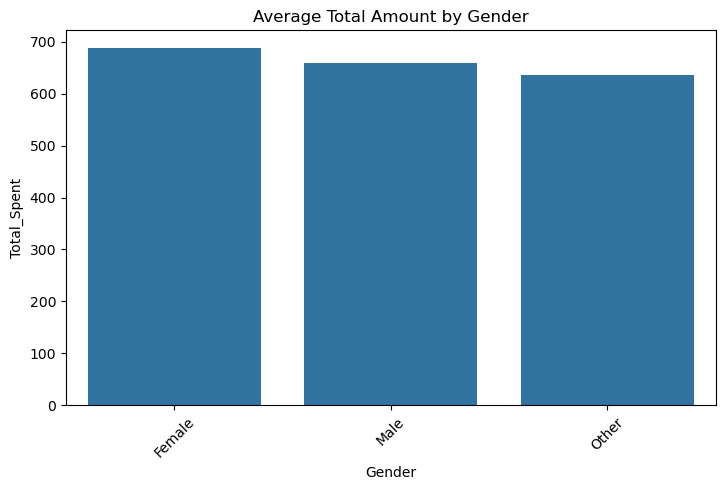

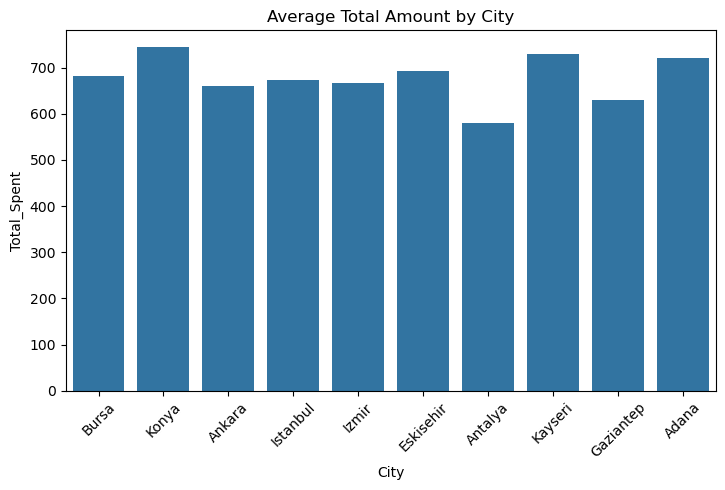

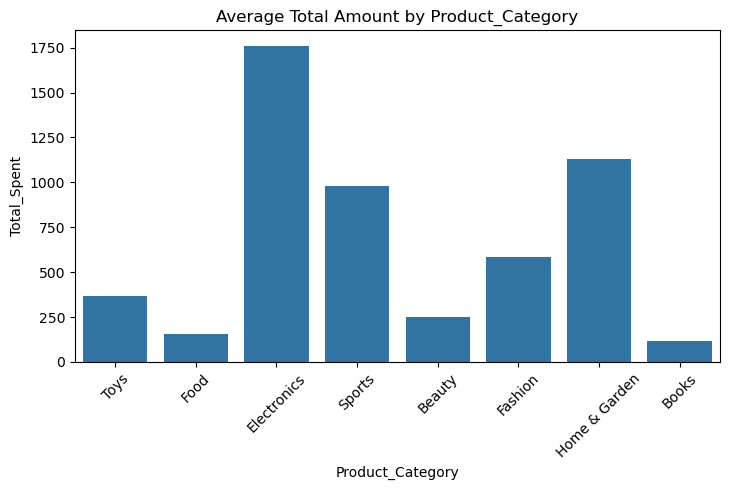

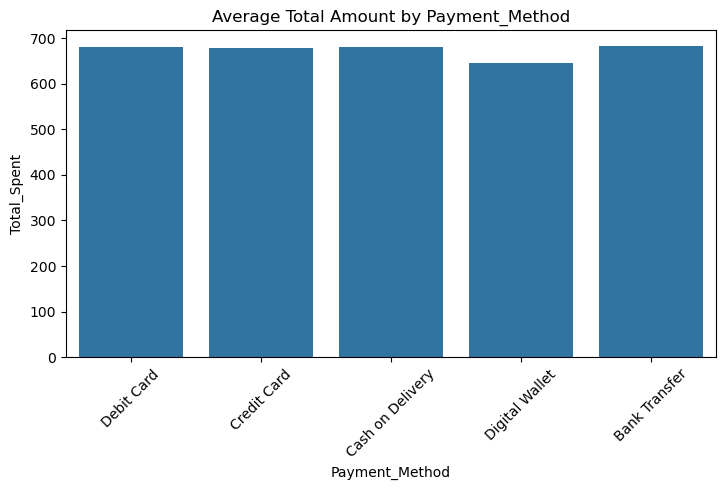

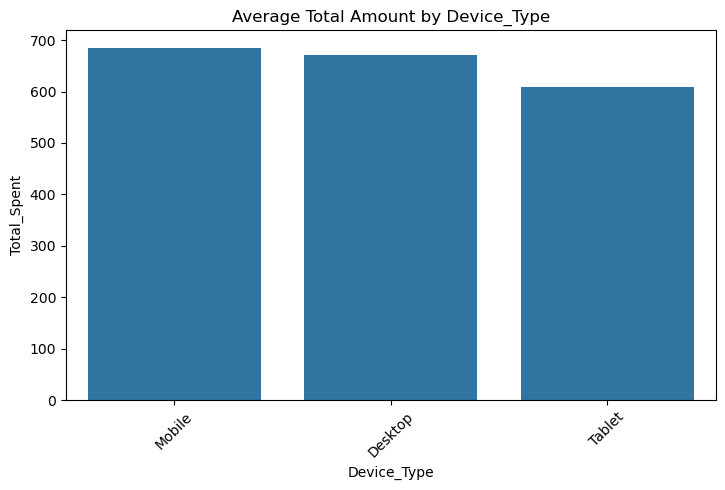

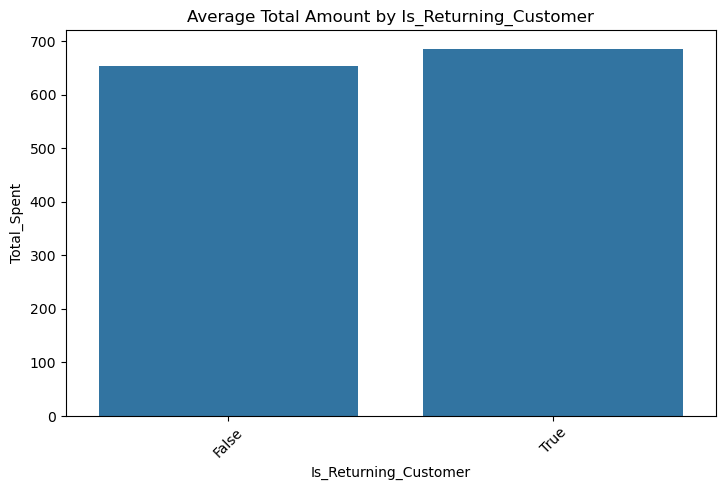

In [103]:

cat_cols = [
    'Gender',
    'City',
    'Product_Category',
    'Payment_Method',
    'Device_Type',
    'Is_Returning_Customer'
]

for col in cat_cols:
    plt.figure(figsize=(14,5))

    # Barplot (Average spend)
    plt.subplot(1,2,1)
    sns.barplot(x=df[col], y=df[target],errorbar=None)
    plt.title(f"Average Total Amount by {col}")
    plt.xticks(rotation=45)


    plt.tight_layout()

In [29]:
num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Total_Amount',
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
            'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend']
cat_cols = ['Gender', 'City',
            'Product_Category', 'Payment_Method', 'Device_Type',
            'Is_Returning_Customer']
target='Total_Spent'

In [30]:

df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekend'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday


In [31]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,MinMaxScaler

In [32]:
scaler=StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


le=LabelEncoder()


for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [33]:
# # One-hot encode categorical columns and drop first to avoid dummy variable trap
# df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# # Optional: convert boolean columns to 0/1 integers
# dummy_cols = [col for col in df.columns if any(c in col for c in cat_cols)]
# df[dummy_cols] = df[dummy_cols].astype(int)

# print("Categorical columns successfully one-hot encoded. New shape:", df.shape)

feature selection using correaltion using numerical vs numerical 

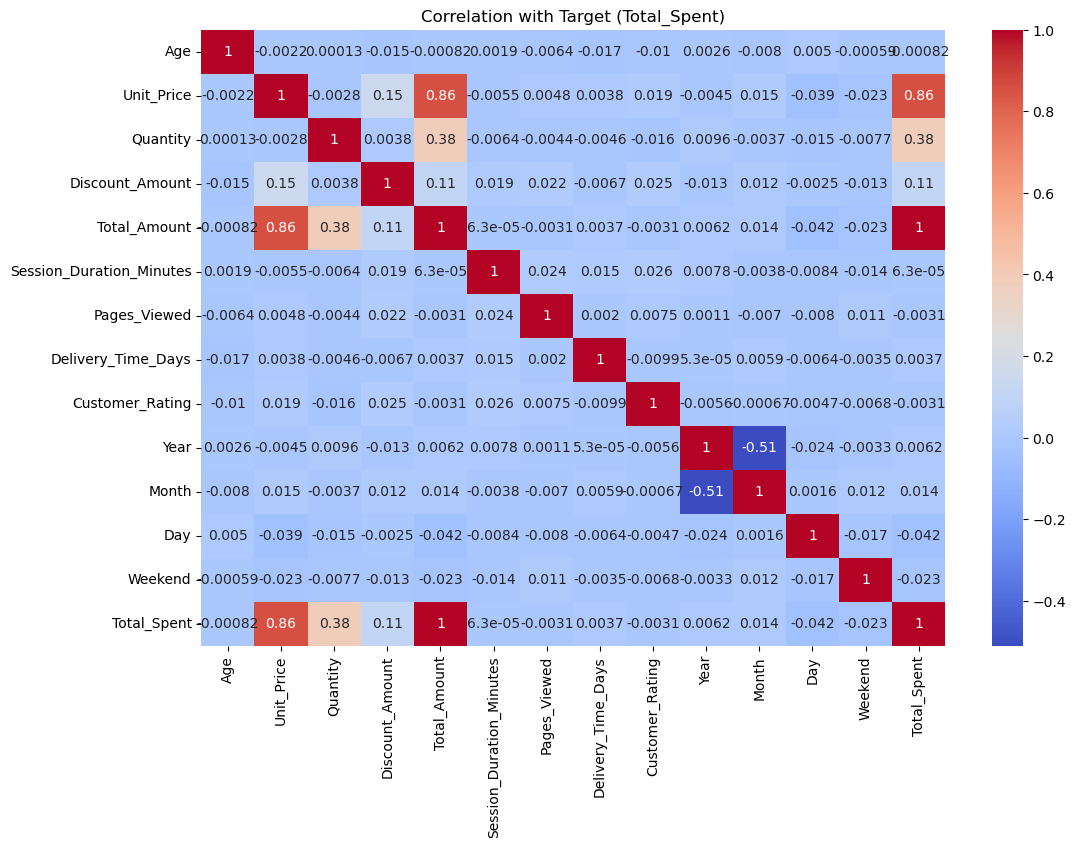

In [34]:

num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Total_Amount',
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
            'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend']

target = ['Total_Spent']   # MUST be a list, correct column name

corr = df[num_cols + target].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation with Target (Total_Spent)")
plt.show()


In [35]:
# Your feature columns
features = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Total_Amount',
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
            'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend',
            'Gender', 'City', 'Product_Category', 'Payment_Method',
            'Device_Type', 'Is_Returning_Customer']

X = df[features]
y =df['Total_Spent']    # your CLV/Total_Spent feature


In [36]:
features


['Age',
 'Unit_Price',
 'Quantity',
 'Discount_Amount',
 'Total_Amount',
 'Session_Duration_Minutes',
 'Pages_Viewed',
 'Delivery_Time_Days',
 'Customer_Rating',
 'Year',
 'Month',
 'Day',
 'Weekend',
 'Gender',
 'City',
 'Product_Category',
 'Payment_Method',
 'Device_Type',
 'Is_Returning_Customer']

In [37]:
print(X.shape)
print(y.shape)


(5000, 19)
(5000,)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x_train:", X_train.shape)
print("x_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



x_train: (4000, 19)
x_test: (1000, 19)
y_train: (4000,)
y_test: (1000,)


In [66]:
# -----------------------------------
# 2. Define Models
# -----------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# -----------------------------------
# 3. Train & Evaluate Models
# -----------------------------------
results = []

for name, model in models.items():

    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train evaluation
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Test evaluation
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results.append({
        'Model': name,
        'Train_MAE': train_mae,
        'Train_MSE': train_mse,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_MAE': test_mae,
        'Test_MSE': test_mse,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2
    })

# -----------------------------------
# 4. Results Table
# -----------------------------------
results_df = pd.DataFrame(results)

# Sort by best Test_RMSE
results_df = results_df.sort_values(by='Test_RMSE', ascending=True)

print("\n📌 Model Performance (Train + Test)\n")
print(results_df)



📌 Model Performance (Train + Test)

               Model     Train_MAE     Train_MSE    Train_RMSE  Train_R2  \
0  Linear Regression  6.827037e-13  7.228727e-25  8.502192e-13  1.000000   
2   Lasso Regression  9.883982e-02  1.702737e-02  1.304890e-01  1.000000   
1   Ridge Regression  3.779767e-01  2.715549e-01  5.211093e-01  1.000000   
5      Random Forest  1.662787e-01  1.610976e-01  4.013697e-01  1.000000   
4      Decision Tree  0.000000e+00  0.000000e+00  0.000000e+00  1.000000   
6  Gradient Boosting  2.482737e+00  1.375064e+01  3.708185e+00  0.999975   
3         ElasticNet  4.313378e+01  3.631760e+03  6.026408e+01  0.993395   
7   SVR (RBF Kernel)  4.728801e+02  5.313742e+05  7.289542e+02  0.033539   

       Test_MAE      Test_MSE     Test_RMSE   Test_R2  
0  6.894538e-13  7.197731e-25  8.483945e-13  1.000000  
2  9.364504e-02  1.481663e-02  1.217236e-01  1.000000  
1  3.571612e-01  2.501788e-01  5.001788e-01  0.999999  
5  3.586250e-01  5.956175e-01  7.717626e-01  0.999999 

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# 1. Ensure X is numeric and has no missing values
X = X.select_dtypes(include=['int64', 'float64'])
X = X.fillna(0)

y = y.fillna(0)

# 2. Define model
model = LinearRegression()

# 3. RFE model
rfe = RFE(estimator=model, n_features_to_select=19)

# 4. Fit RFE
rfe.fit(X, y)

# 5. Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
       'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend',
       'Is_Returning_Customer'],
      dtype='object')


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=19 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


In [40]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# -------------------------------
# 1️⃣ Define all models
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Optional: XGBoost if installed
try:
    from xgboost import XGBRegressor
    models['XGBoost'] = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
except:
    print("⚠️ XGBoost is not installed. Skipping XGBoost model.")

# -------------------------------
# 2️⃣ Train and evaluate each model
# -------------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE':mse,
        'RMSE': rmse,
        'R2_Score': r2
    })

# -------------------------------
# 3️⃣ Results in sorted order
# -------------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE', ascending=True)
print(results_df)


               Model           MAE           MSE          RMSE  R2_Score
0  Linear Regression  6.894538e-13  7.197731e-25  8.483945e-13  1.000000
2   Lasso Regression  9.364504e-02  1.481663e-02  1.217236e-01  1.000000
1   Ridge Regression  3.571612e-01  2.501788e-01  5.001788e-01  0.999999
5      Random Forest  3.586250e-01  5.956175e-01  7.717626e-01  0.999999
4      Decision Tree  6.620000e-01  2.540000e+00  1.593738e+00  0.999995
6  Gradient Boosting  2.708745e+00  1.609947e+01  4.012415e+00  0.999967
8            XGBoost  2.368904e+00  2.093523e+01  4.575503e+00  0.999957
3         ElasticNet  4.054182e+01  3.311757e+03  5.754786e+01  0.993162
7   SVR (RBF Kernel)  4.247094e+02  4.477477e+05  6.691395e+02  0.075565


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

selected_rfe_features = X_train.columns[rfe.support_]
print("\n✅ Top 10 Features Selected by RFE:\n", selected_rfe_features)



✅ Top 10 Features Selected by RFE:
 Index(['Unit_Price', 'Total_Amount', 'Delivery_Time_Days', 'Year', 'Month',
       'Day', 'Weekend', 'Payment_Method', 'Is_Returning_Customer'],
      dtype='object')


In [43]:
# Select only RFE chosen columns
X_train_rfe = X_train[selected_rfe_features]
X_test_rfe  = X_test[selected_rfe_features]


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

results = []

# -------------------------------
#  Model definitions
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# -------------------------------
#  Train & evaluate using RFE features
# -------------------------------
for name, model in models.items():

    model.fit(X_train_rfe, y_train)

    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)

    # Training metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Testing metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results.append({
        'Model': name,
        'Train_MAE': train_mae,
        'Train_MSE': train_mse,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_MAE': test_mae,
        'Test_MSE': test_mse,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2
    })

# -------------------------------
#  Sort by Test RMSE
# -------------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test_RMSE', ascending=True)

print("\n📌 Model Performance Using RFE Selected Features\n")
print(results_df)



📌 Model Performance Using RFE Selected Features

               Model     Train_MAE     Train_MSE    Train_RMSE  Train_R2  \
0  Linear Regression  3.878284e-13  2.638116e-25  5.136260e-13  1.000000   
2   Lasso Regression  9.700143e-02  1.499984e-02  1.224738e-01  1.000000   
1   Ridge Regression  2.457308e-01  1.224740e-01  3.499629e-01  1.000000   
5      Random Forest  1.511775e-01  1.383032e-01  3.718914e-01  1.000000   
4      Decision Tree  0.000000e+00  0.000000e+00  0.000000e+00  1.000000   
6  Gradient Boosting  2.401293e+00  1.294418e+01  3.597802e+00  0.999976   
3         ElasticNet  3.885615e+01  2.876825e+03  5.363604e+01  0.994768   
7   SVR (RBF Kernel)  3.914329e+02  3.655365e+05  6.045962e+02  0.335164   

       Test_MAE      Test_MSE     Test_RMSE   Test_R2  
0  3.652758e-13  2.433397e-25  4.932948e-13  1.000000  
2  9.229292e-02  1.291817e-02  1.136581e-01  1.000000  
1  2.372544e-01  1.092881e-01  3.305876e-01  1.000000  
5  3.304650e-01  5.302697e-01  7.281962e-

In [45]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [46]:
import random
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Step 1: Select 10 random features
random_features = random.sample(list(X_train.columns), 10)
X_train_random = X_train[random_features]
X_test_random  = X_test[random_features]

# Step 2: Forward Selection
lr = LinearRegression()

sfs = SFS(lr,
          k_features='best',      # select all features that improve model
          forward=True,           # forward selection
          floating=False,
          scoring='r2',
          cv=5)                   # 5-fold CV

sfs.fit(X_train_random, y_train)

# Step 3: Selected features
selected_forward_features = list(sfs.k_feature_names_)
print("✅ Forward Selection Chosen Features from Random 10:", selected_forward_features)


✅ Forward Selection Chosen Features from Random 10: ['Discount_Amount', 'Device_Type', 'Unit_Price', 'Product_Category', 'Customer_Rating']


above using forward selection for feature selection its have only one features and it highly correalted feature also .
so we cannot use forward selection for feature selection.


In [47]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Train a Random Forest on all features
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort features by importance
importances = importances.sort_values(ascending=False)
print("\n🔥 Feature Importances (Random Forest):\n")
print(importances)



🔥 Feature Importances (Random Forest):

Total_Amount                9.999952e-01
Unit_Price                  4.560943e-07
Age                         4.292082e-07
Session_Duration_Minutes    3.989298e-07
Day                         3.929760e-07
Month                       3.710549e-07
Pages_Viewed                3.643207e-07
Delivery_Time_Days          3.635323e-07
Weekend                     3.471156e-07
City                        3.209754e-07
Product_Category            2.246366e-07
Customer_Rating             2.217725e-07
Payment_Method              1.981425e-07
Quantity                    1.883461e-07
Device_Type                 1.668661e-07
Year                        1.111514e-07
Discount_Amount             9.940528e-08
Gender                      9.826282e-08
Is_Returning_Customer       8.899756e-08
dtype: float64


In [48]:
top_rfi_features = importances.head(18).index.tolist()
# print("\n✅ Top 10 Features Selected by RFI:\n", top_rfi_features)
# Include Gender and Is_Returning_Customer in addition to top RFI features
extra_features = ['Gender', 'Is_Returning_Customer']
rfi_features_final = top_rfi_features+ extra_features

X_train_rfi = X_train[rfi_features_final]
X_test_rfi  = X_test[rfi_features_final]

print("✅ Features used in model:", rfi_features_final)



✅ Features used in model: ['Total_Amount', 'Unit_Price', 'Age', 'Session_Duration_Minutes', 'Day', 'Month', 'Pages_Viewed', 'Delivery_Time_Days', 'Weekend', 'City', 'Product_Category', 'Customer_Rating', 'Payment_Method', 'Quantity', 'Device_Type', 'Year', 'Discount_Amount', 'Gender', 'Gender', 'Is_Returning_Customer']


In [59]:

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Evaluate all models
results = []

for name, model in models.items():
    model.fit(X_train_rfi, y_train)
    y_pred = model.predict(X_test_rfi)
    
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2_Score': r2
    })

# Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE', ascending=True)
print("\n📌 Model Performance Using RFI Features + Optional Categorical Features")
print(results_df)



📌 Model Performance Using RFI Features + Optional Categorical Features
               Model           MAE           MSE          RMSE  R2_Score
0  Linear Regression  6.693483e-12  6.040030e-23  7.771763e-12  1.000000
2   Lasso Regression  7.657499e-02  8.678270e-03  9.315723e-02  1.000000
1   Ridge Regression  3.571612e-01  2.501788e-01  5.001788e-01  0.999999
5      Random Forest  3.519150e-01  5.699084e-01  7.549228e-01  0.999999
4      Decision Tree  5.860000e-01  1.954000e+00  1.397856e+00  0.999996
6  Gradient Boosting  2.709140e+00  1.613082e+01  4.016320e+00  0.999967
3         ElasticNet  4.046524e+01  3.299638e+03  5.744248e+01  0.993187
7   SVR (RBF Kernel)  4.253314e+02  4.489064e+05  6.700048e+02  0.073172


In [61]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

results = []

for name, model in models.items():

    model.fit(X_train_rfi, y_train)

    # -------------------------
    # TRAIN PREDICTIONS
    # -------------------------
    y_train_pred = model.predict(X_train_rfi)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # -------------------------
    # TEST PREDICTIONS
    # -------------------------
    y_test_pred = model.predict(X_test_rfi)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # -------------------------
    # SAVE RESULTS
    # -------------------------
    results.append({
        'Model': name,
        'Train_MAE': train_mae,
        'Train_MSE': train_mse,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_MAE': test_mae,
        'Test_MSE': test_mse,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2
    })

# Convert results to dataframe
results_df = pd.DataFrame(results)

# Sort by Test RMSE (lower = better)
results_df = results_df.sort_values(by='Test_RMSE', ascending=True)

print("\n📌 Model Performance Using RFI Selected Features")
print(results_df)



📌 Model Performance Using RFI Selected Features
               Model     Train_MAE     Train_MSE    Train_RMSE  Train_R2  \
0  Linear Regression  6.618066e-12  5.929524e-23  7.700340e-12  1.000000   
2   Lasso Regression  8.056547e-02  9.773128e-03  9.885913e-02  1.000000   
1   Ridge Regression  3.779768e-01  2.715549e-01  5.211093e-01  1.000000   
5      Random Forest  1.666600e-01  1.671912e-01  4.088902e-01  1.000000   
4      Decision Tree  0.000000e+00  0.000000e+00  0.000000e+00  1.000000   
6  Gradient Boosting  2.482737e+00  1.375064e+01  3.708185e+00  0.999975   
3         ElasticNet  4.305474e+01  3.618772e+03  6.015623e+01  0.993418   
7   SVR (RBF Kernel)  4.735521e+02  5.327320e+05  7.298849e+02  0.031069   

       Test_MAE      Test_MSE     Test_RMSE   Test_R2  
0  6.693483e-12  6.040030e-23  7.771763e-12  1.000000  
2  7.657499e-02  8.678270e-03  9.315723e-02  1.000000  
1  3.571612e-01  2.501788e-01  5.001788e-01  0.999999  
5  3.519150e-01  5.699084e-01  7.549228e-0

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top k features based on ANOVA F-test
k = 13 # number of features to select
anova_selector = SelectKBest(score_func=f_regression, k=k)

# Fit selector on training data
anova_selector.fit(X_train, y_train)

# Get mask of selected features
anova_mask = anova_selector.get_support()

# Get feature names
anova_features = X_train.columns[anova_mask].tolist()
print("\n✅ Top 10 Features Selected by ANOVA:\n", anova_features)
X_train_anova = X_train[anova_features]
X_test_anova  = X_test[anova_features]




✅ Top 10 Features Selected by ANOVA:
 ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount', 'Month', 'Day', 'Weekend', 'Gender', 'City', 'Product_Category', 'Device_Type', 'Is_Returning_Customer']


In [58]:

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Evaluate all models
results = []

for name, model in models.items():
    model.fit(X_train_anova, y_train)
    y_pred = model.predict(X_test_anova)

     
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2_Score': r2
    })

# Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE', ascending=True)
print("\n📌 Model Performance Using ANOVA Selected Features")
print(results_df)



📌 Model Performance Using ANOVA Selected Features
               Model           MAE           MSE          RMSE  R2_Score
0  Linear Regression  1.499075e-12  3.636047e-24  1.906842e-12  1.000000
2   Lasso Regression  9.338704e-02  1.464117e-02  1.210007e-01  1.000000
1   Ridge Regression  3.565384e-01  2.499891e-01  4.999891e-01  0.999999
5      Random Forest  3.503950e-01  5.867188e-01  7.659757e-01  0.999999
4      Decision Tree  6.090000e-01  2.189000e+00  1.479527e+00  0.999995
6  Gradient Boosting  2.659303e+00  1.552878e+01  3.940657e+00  0.999968
3         ElasticNet  4.052983e+01  3.315655e+03  5.758172e+01  0.993154
7   SVR (RBF Kernel)  4.059005e+02  4.153474e+05  6.444745e+02  0.142459


In [77]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

results = []

for name, model in models.items():

    model.fit(X_train_anova, y_train)

    # -------- TRAIN PREDICTIONS --------
    y_train_pred = model.predict(X_train_anova)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # -------- TEST PREDICTIONS --------
    y_test_pred = model.predict(X_test_anova)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # -------- SAVE RESULTS --------
    results.append({
        'Model': name,
        'Train_MAE': train_mae,
        'Train_MSE': train_mse,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_MAE': test_mae,
        'Test_MSE': test_mse,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test_RMSE', ascending=True)

print("\n📌 Model Evaluation Using ANOVA Selected Features")
print(results_df)



📌 Model Evaluation Using ANOVA Selected Features
               Model     Train_MAE     Train_MSE    Train_RMSE  Train_R2  \
0  Linear Regression  1.566150e-12  3.870939e-24  1.967470e-12  1.000000   
2   Lasso Regression  9.857577e-02  1.683619e-02  1.297544e-01  1.000000   
1   Ridge Regression  3.771171e-01  2.710099e-01  5.205861e-01  1.000000   
5      Random Forest  1.589825e-01  1.524311e-01  3.904243e-01  1.000000   
4      Decision Tree  0.000000e+00  0.000000e+00  0.000000e+00  1.000000   
6  Gradient Boosting  2.466642e+00  1.373444e+01  3.706001e+00  0.999975   
3         ElasticNet  4.310248e+01  3.631540e+03  6.026226e+01  0.993395   
7   SVR (RBF Kernel)  4.523652e+02  4.928213e+05  7.020123e+02  0.103659   

       Test_MAE      Test_MSE     Test_RMSE   Test_R2  
0  1.499075e-12  3.636047e-24  1.906842e-12  1.000000  
2  9.338704e-02  1.464117e-02  1.210007e-01  1.000000  
1  3.565384e-01  2.499891e-01  4.999891e-01  0.999999  
5  3.503950e-01  5.867188e-01  7.659757e-

In [116]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# Example: assuming you have X, y (your features and target)
# X = df[selected_features_from_RFE]
# y = df['target_column']

# Initialize linear model
lr = LinearRegression()

# ------------------------------
# Optional: Use Ridge/Lasso/ElasticNet for hyperparameter tuning
# ------------------------------
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

# Define hyperparameter grid
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100], 
    'fit_intercept': [True, False],
    'positive': [True, False]
}

param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'positive': [True, False],
    'max_iter': [1000, 5000, 10000]
}

param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000]
}

# ------------------------------
# Cross-validation setup
# ------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform GridSearchCV and CV metrics
def tune_model(model, param_grid, X_train_rfe, y_train_pred, cv):
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='r2', n_jobs=-1)
    grid.fit(X_train_rfe, y_train)
    best_model = grid.best_estimator_
    
    # Cross-validation scores
    r2_scores = cross_val_score(best_model, X_train_rfe, y_train_pred, cv=cv, scoring='r2')
    mae_scores = -cross_val_score(best_model, X_train_rfe, y_train_pred, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(best_model, X_train_rfe, y_train_pred, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    
    print("Best Hyperparameters:", grid.best_params_)
    print("CV R²: {:.4f} ± {:.4f}".format(r2_scores.mean(), r2_scores.std()))
    print("CV MAE: {:.4f} ± {:.4f}".format(mae_scores.mean(), mae_scores.std()))
    print("CV MSE: {:.4f} ± {:.4f}".format(mse_scores.mean(), mse_scores.std()))
    print("CV RMSE: {:.4f} ± {:.4f}".format(rmse_scores.mean(), rmse_scores.std()))
    
    return best_model

# ------------------------------
# Run tuning for all linear models
# ------------------------------
print("----- Ridge Regression -----")
best_ridge = tune_model(ridge, param_grid_ridge, X_train_rfe, y_train_pred, kf)

print("\n----- Lasso Regression -----")
best_lasso = tune_model(lasso, param_grid_lasso, X_train_rfe, y_train_pred, kf)

print("\n----- ElasticNet Regression -----")
best_elastic = tune_model(elastic, param_grid_elastic, X_train_rfe, y_train_pred, kf)

# ------------------------------
# Optional: just plain Linear Regression CV
# ------------------------------
lr_r2 = cross_val_score(lr, X_train_rfe, y_train_pred, cv=kf, scoring='r2')
lr_mae = -cross_val_score(lr, X_train_rfe, y_train_pred, cv=kf, scoring='neg_mean_absolute_error')
lr_mse = -cross_val_score(lr, X_train_rfe, y_train_pred, cv=kf, scoring='neg_mean_squared_error')
lr_rmse = np.sqrt(lr_mse)

print("\n----- Linear Regression -----")
print("CV R²: {:.4f} ± {:.4f}".format(lr_r2.mean(), lr_r2.std()))
print("CV MAE: {:.4f} ± {:.4f}".format(lr_mae.mean(), lr_mae.std()))
print("CV MSE: {:.4f} ± {:.4f}".format(lr_mse.mean(), lr_mse.std()))
print("CV RMSE: {:.4f} ± {:.4f}".format(lr_rmse.mean(), lr_rmse.std()))


----- Ridge Regression -----
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'positive': False}
CV R²: 0.8343 ± 0.0089
CV MAE: 41.9101 ± 0.5663
CV MSE: 2439.9173 ± 51.7104
CV RMSE: 49.3927 ± 0.5232

----- Lasso Regression -----
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'positive': False}
CV R²: 0.8343 ± 0.0089
CV MAE: 41.9101 ± 0.5658
CV MSE: 2439.8847 ± 51.6622
CV RMSE: 49.3924 ± 0.5227

----- ElasticNet Regression -----
Best Hyperparameters: {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.9, 'max_iter': 1000}
CV R²: 0.8343 ± 0.0089
CV MAE: 41.9102 ± 0.5661
CV MSE: 2439.9145 ± 51.6861
CV RMSE: 49.3927 ± 0.5230

----- Linear Regression -----
CV R²: 0.8343 ± 0.0089
CV MAE: 41.9101 ± 0.5663
CV MSE: 2439.9173 ± 51.7108
CV RMSE: 49.3927 ± 0.5232


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()
r2_scores = cross_val_score(lr, X_train_rfe, y_train, cv=5, scoring='r2')
mae_scores = -cross_val_score(lr, X_train_rfe, y_train, cv=5, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(lr, X_train_rfe, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)

print("CV R²:", r2_scores)
print("CV MAE:", mae_scores)
print("CV RMSE:", rmse_scores)


CV R²: [1. 1. 1. 1. 1.]
CV MAE: [2.17639240e-13 2.99422709e-13 2.94164693e-13 1.07398535e-12
 6.46593890e-13]
CV RMSE: [2.55360795e-13 4.09913576e-13 3.82332740e-13 1.35129462e-12
 8.12304190e-13]


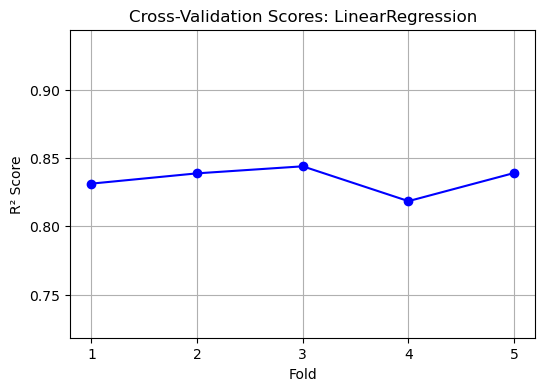

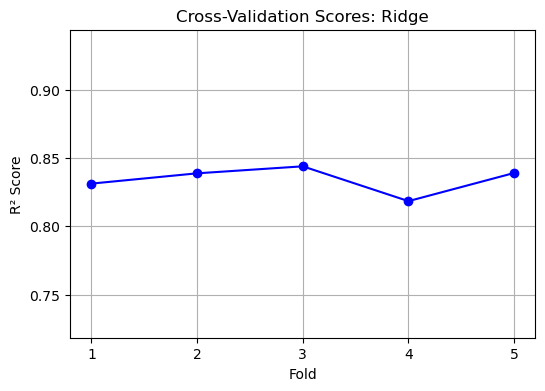

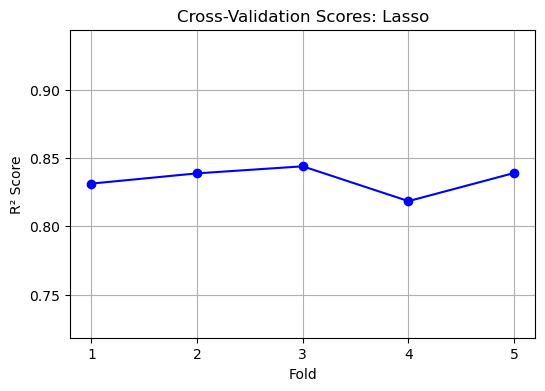

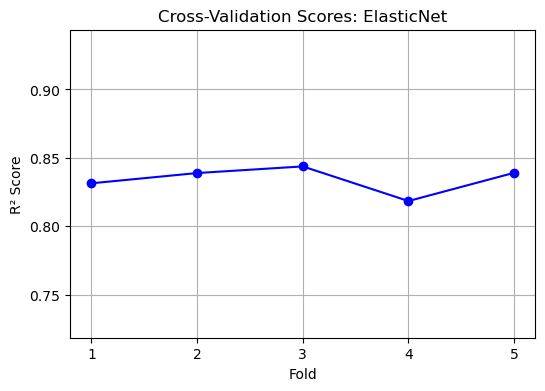

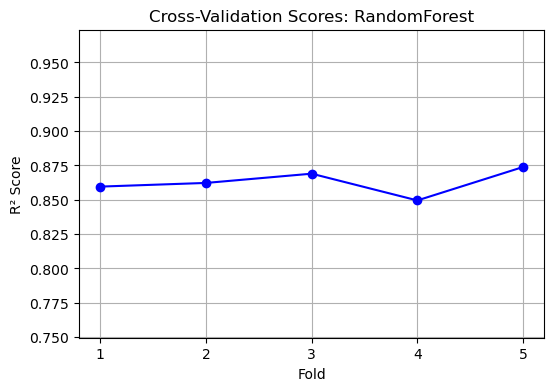

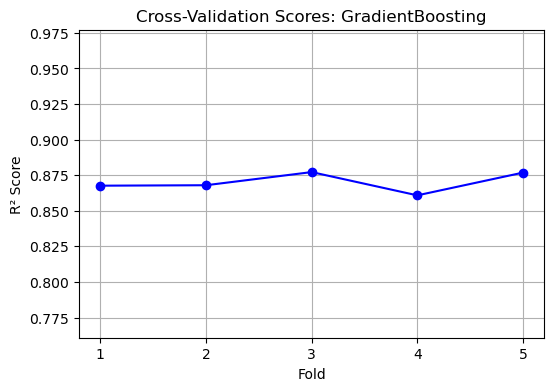

In [114]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression

# -------------------------
# Example dataset
# -------------------------
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# -------------------------
# Models
# -------------------------
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, max_iter=5000),
    'Lasso': Lasso(alpha=0.01, max_iter=5000),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# -------------------------
# K-Fold CV
# -------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------
# Plot CV scores separately
# -------------------------
for name, model in models.items():
    # Calculate cross-validation scores
    scores = cross_val_score(model, X_train_rfe, y_train_pred, cv=kf, scoring='r2')
    
    # Plot
    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='blue')
    plt.title(f"Cross-Validation Scores: {name}")
    plt.xlabel("Fold")
    plt.ylabel("R² Score")
    plt.xticks(range(1, kf.get_n_splits() + 1))
    plt.ylim(min(scores)-0.1, max(scores)+0.1)  # dynamic y-axis
    plt.grid(True)
    plt.show()


In [71]:
# -------------------------------
# Imports
# -------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# Example: X_train_rfe, X_test_rfe, y_train, y_test
# -------------------------------
# Assume X_train_rfe, X_test_rfe, y_train, y_test are already defined from RFE

# -------------------------------
# Models and hyperparameter grids
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=5000),
    'ElasticNet Regression': ElasticNet(max_iter=5000),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1)
}

param_grids = {
    'Linear Regression': {},  # LinearRegression has very few tunable params
    'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10], 'fit_intercept': [True, False]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1, 1], 'fit_intercept': [True, False]},
    'ElasticNet Regression': {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0.1, 0.3, 0.5, 0.7]},
    'Random Forest': {'n_estimators': [100, 300], 'max_depth': [None, 5, 10]}
}

# -------------------------------
# Store results
# -------------------------------
results = []

for name, model in models.items():
    print(f"\n➡️ Tuning {name} ...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train_rfe, y_train)
    
    best_model = grid.best_estimator_
    print(f"Best params: {grid.best_params_}")

    # Predictions
    y_train_pred = best_model.predict(X_train_rfe)
    y_test_pred = best_model.predict(X_test_rfe)
    
    # Training metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Testing metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results.append({
        'Model': name,
        'Train_MAE': train_mae,
        'Train_MSE': train_mse,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_MAE': test_mae,
        'Test_MSE': test_mse,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2
    })

# -------------------------------
# Sort by Test RMSE
# -------------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test_RMSE', ascending=True)

print("\n📌 Model Performance Using RFE Features and Hyperparameter Tuning\n")
print(results_df)



➡️ Tuning Linear Regression ...
Best params: {}

➡️ Tuning Ridge Regression ...
Best params: {'alpha': 0.01, 'fit_intercept': True}

➡️ Tuning Lasso Regression ...
Best params: {'alpha': 0.01, 'fit_intercept': True}

➡️ Tuning ElasticNet Regression ...
Best params: {'alpha': 0.001, 'l1_ratio': 0.7}

➡️ Tuning Random Forest ...
Best params: {'max_depth': None, 'n_estimators': 300}

📌 Model Performance Using RFE Features and Hyperparameter Tuning

                   Model     Train_MAE     Train_MSE    Train_RMSE  Train_R2  \
0      Linear Regression  3.878284e-13  2.638116e-25  5.136260e-13       1.0   
1       Ridge Regression  2.460766e-03  1.228608e-05  3.505151e-03       1.0   
2       Lasso Regression  6.625284e-02  9.782434e-03  9.890619e-02       1.0   
3  ElasticNet Regression  2.987898e-01  1.823786e-01  4.270581e-01       1.0   
4          Random Forest  1.395958e-01  1.163336e-01  3.410771e-01       1.0   

       Test_MAE      Test_MSE     Test_RMSE   Test_R2  
0  3.652758e

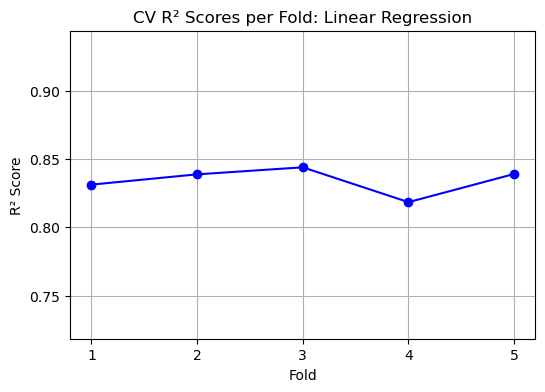

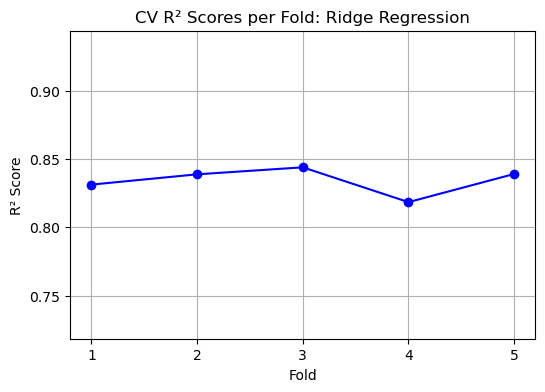

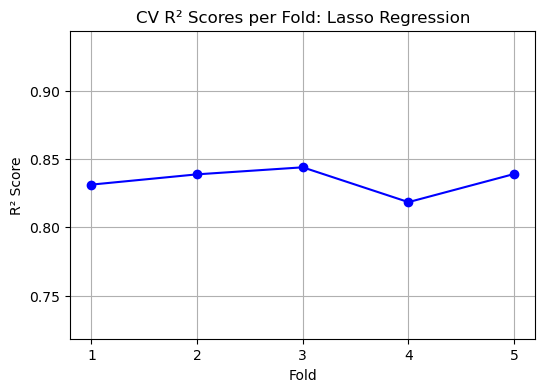

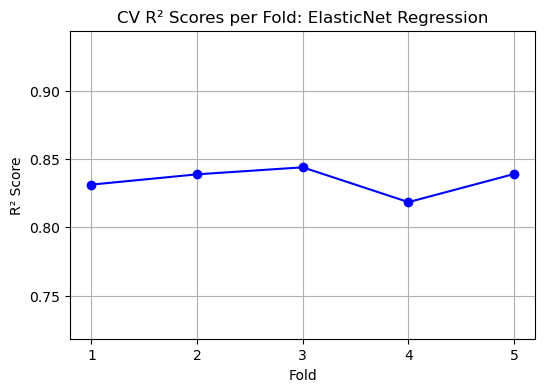

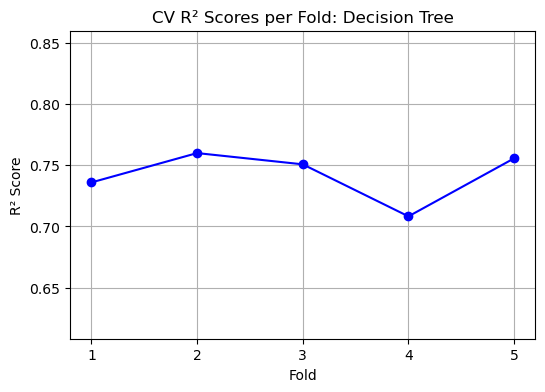

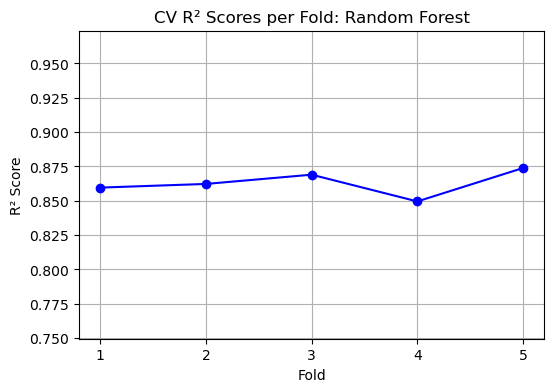

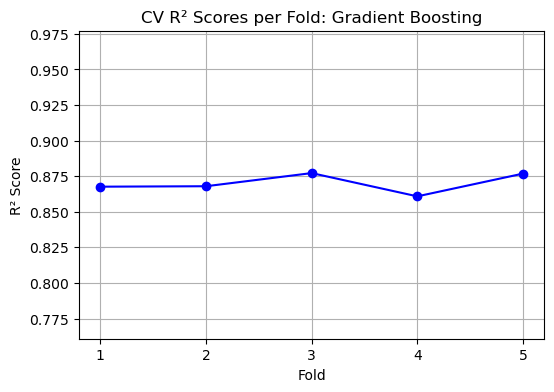

In [112]:
# -------------------------------
# Imports
# -------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# -------------------------------
# Models dictionary
# -------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=5000),
    "ElasticNet Regression": ElasticNet(alpha=0.001, l1_ratio=0.9, max_iter=5000),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# -------------------------------
# K-Fold setup
# -------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------------
# Store results
# -------------------------------
results = []

for name, model in models.items():
    # Cross-validation scores
    r2_scores = cross_val_score(model, X_train_rfe, y_train_pred, cv=kf, scoring='r2')
    mae_scores = -cross_val_score(model, X_train_rfe, y_train_pred, cv=kf, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X_train_rfe, y_train_pred, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    
    # # Store results
    # results.append({
    #     "Model": name,
    #     "CV_R2_Mean": np.mean(r2_scores),
    #     "CV_R2_STD": np.std(r2_scores),
    #     "CV_MAE_Mean": np.mean(mae_scores),
    #     "CV_MAE_STD": np.std(mae_scores),
    #     "CV_RMSE_Mean": np.mean(rmse_scores),
    #     "CV_RMSE_STD": np.std(rmse_scores)
    # })
    
    # Plot CV R² per fold
    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(r2_scores)+1), r2_scores, marker='o', linestyle='-', color='blue')
    plt.title(f"CV R² Scores per Fold: {name}")
    plt.xlabel("Fold")
    plt.ylabel("R² Score")
    plt.xticks(range(1, kf.get_n_splits()+1))
    plt.ylim(min(r2_scores)-0.1, max(r2_scores)+0.1)
    plt.grid(True)
    plt.show()

# -------------------------------
# Display results in a DataFrame
